**CREDIT RISK ANALYSIS CLASSIFICATIN PPT**
https://drive.google.com/file/d/1sQ9oLL0tmleW49AnGpqzh56AbRzPmV5Y/view?usp=sharing

**PROJECT -2 CLASSIFICATION**

In [ ]:
#import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





**Loading the data set / Pre-Processing**

In [ ]:
#reading the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of Credit Risk Prediction(1).xlsx')
data

,laufkont,run time,moral,verw,height,sparkont,beszeit,rate,famges,buerge,...,verm,age,weitkred,residential,bishkred,occupation,press,telef,gastarb,credit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Identify numerical columns (excluding the target variable)
numerical_cols = data.select_dtypes(exclude=['object']).columns

# Count of categorical and numerical variables
num_categorical = len(categorical_cols)
num_numerical = len(numerical_cols)

print("Count of Categorical Variables:", num_categorical)
print("Categorical Columns:")
print(categorical_cols)

print("Count of Numerical Variables:", num_numerical)

print("\nNumerical Columns:")
print(numerical_cols)



Count of Categorical Variables: 0
Categorical Columns:
Index([], dtype='object')
Count of Numerical Variables: 21

Numerical Columns:
Index(['laufkont', 'run time', 'moral', 'verw', 'height', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'age',
       'weitkred', 'residential', 'bishkred', 'occupation', 'press', 'telef',
       'gastarb', 'credit'],
      dtype='object')


In [ ]:
#renaming the columns
data.columns= ('status','duration','credit_history','purpose','amount','savings','employement_duration','installation_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk')
data.head()

,status,duration,credit_history,purpose,amount,savings,employement_duration,installation_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


**EDA**


1) listing the variables

In [ ]:
# Find numerical variables
numerical_vars = [col for col in data.columns if data[col].dtype != 'object']
print('There are {} numerical variables\n'.format(len(numerical_vars )))
print('The numerical variables are:\n\n', numerical_vars )

There are 21 numerical variables

The numerical variables are:

 ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employement_duration', 'installation_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']


2) checking out the missing values

In [ ]:
# Find missing values in the dataset
missing_values = data.isnull().sum()

if missing_values.sum() == 0:
    print("No missing data in the dataset.")
else:
    print("Missing values in each column:")
    print(missing_values)

No missing data in the dataset.


*3*) duplicate the data

In [ ]:
data.duplicated().sum()

0

4) show the data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employement_duration     1000 non-null   int64
 7   installation_rate        1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

5) distribution of data

In [ ]:
data.describe()

,status,duration,credit_history,purpose,amount,savings,employement_duration,installation_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


6) determining the data shape

In [ ]:
data.shape

(1000, 21)

**Dummy Variable Encoding**

In [ ]:
categorical_columns = ["status", "credit_history", "purpose", "personal_status_sex", "other_debtors", "other_installment_plans", "housing"]

# Rename the column 'saving' to avoid keyword conflict
data.rename(columns={'saving': 'savings'}, inplace=True)

# Perform dummy variable encoding for each categorical column
for column in categorical_columns:
    dummy_data = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data = pd.concat([data, dummy_data], axis=1)

# Drop the original categorical columns
data = data.drop(categorical_columns, axis=1)

# Display the result
print("\nDataFrame after encoding:")
print(data)


DataFrame after encoding:
     duration  amount  savings  employement_duration  installation_rate  \
0          18    1049        1                     2                  4   
1           9    2799        1                     3                  2   
2          12     841        2                     4                  2   
3          12    2122        1                     3                  3   
4          12    2171        1                     3                  4   
..        ...     ...      ...                   ...                ...   
995        24    1987        1                     3                  2   
996        24    2303        1                     5                  4   
997        21   12680        5                     5                  4   
998        12    6468        5                     1                  2   
999        30    6350        5                     5                  4   

     present_residence  property  age  number_credits  job  ...  purpose

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   duration                   1000 non-null   int64
 1   amount                     1000 non-null   int64
 2   savings                    1000 non-null   int64
 3   employement_duration       1000 non-null   int64
 4   installation_rate          1000 non-null   int64
 5   present_residence          1000 non-null   int64
 6   property                   1000 non-null   int64
 7   age                        1000 non-null   int64
 8   number_credits             1000 non-null   int64
 9   job                        1000 non-null   int64
 10  people_liable              1000 non-null   int64
 11  telephone                  1000 non-null   int64
 12  foreign_worker             1000 non-null   int64
 13  credit_risk                1000 non-null   int64
 14  status_2                 

**DATA VISUALISATION**

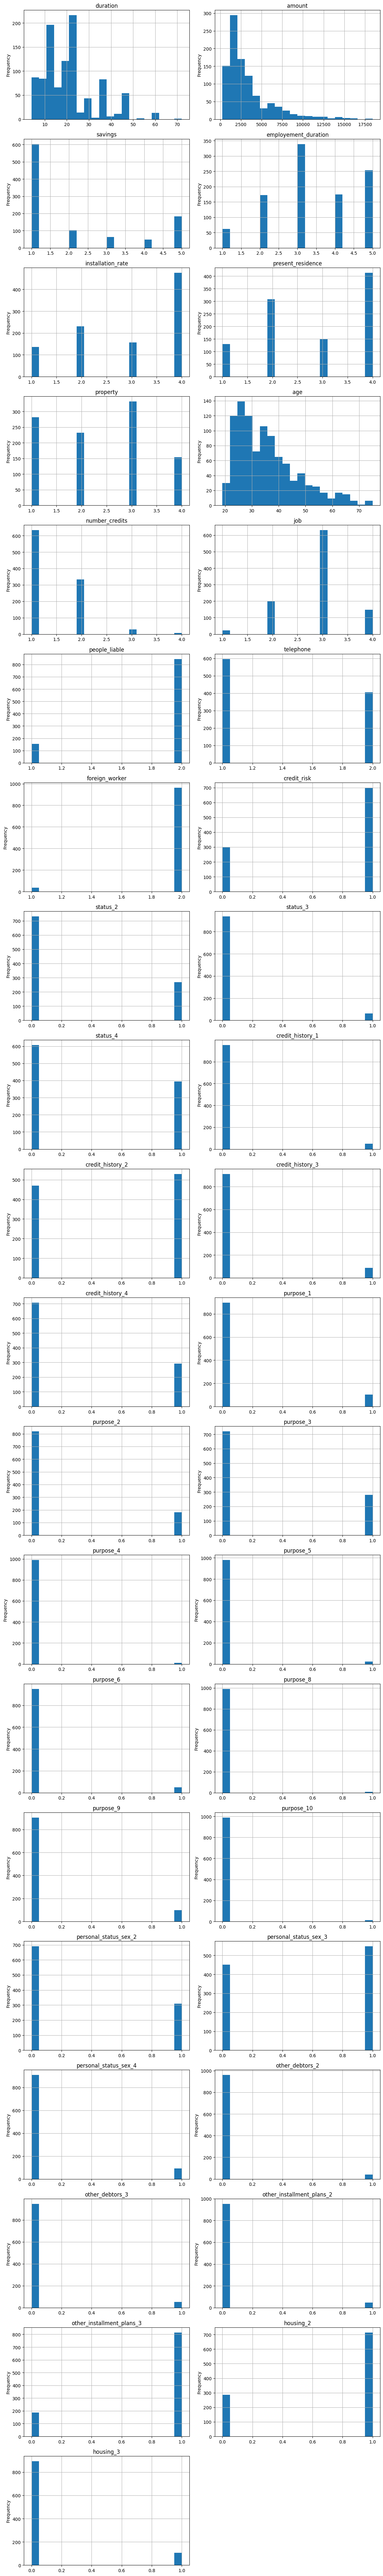

In [ ]:
# Draw histograms for each column in the dataset
num_columns = data.shape[1]
num_rows = (num_columns + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))  # Adjust figsize based on num_rows

# Flatten axes if multiple rows are used
axes = axes.flatten()

for i, column in enumerate(data.columns):
    data[column].hist(ax=axes[i], bins=20)  # Adjust bins as needed
    axes[i].set_title(f"{column}")
   # axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# If there's an odd number of columns, remove the empty subplot
if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Adjust layout for spacing between subplots
plt.show()


**Creating correlation Heatmap**

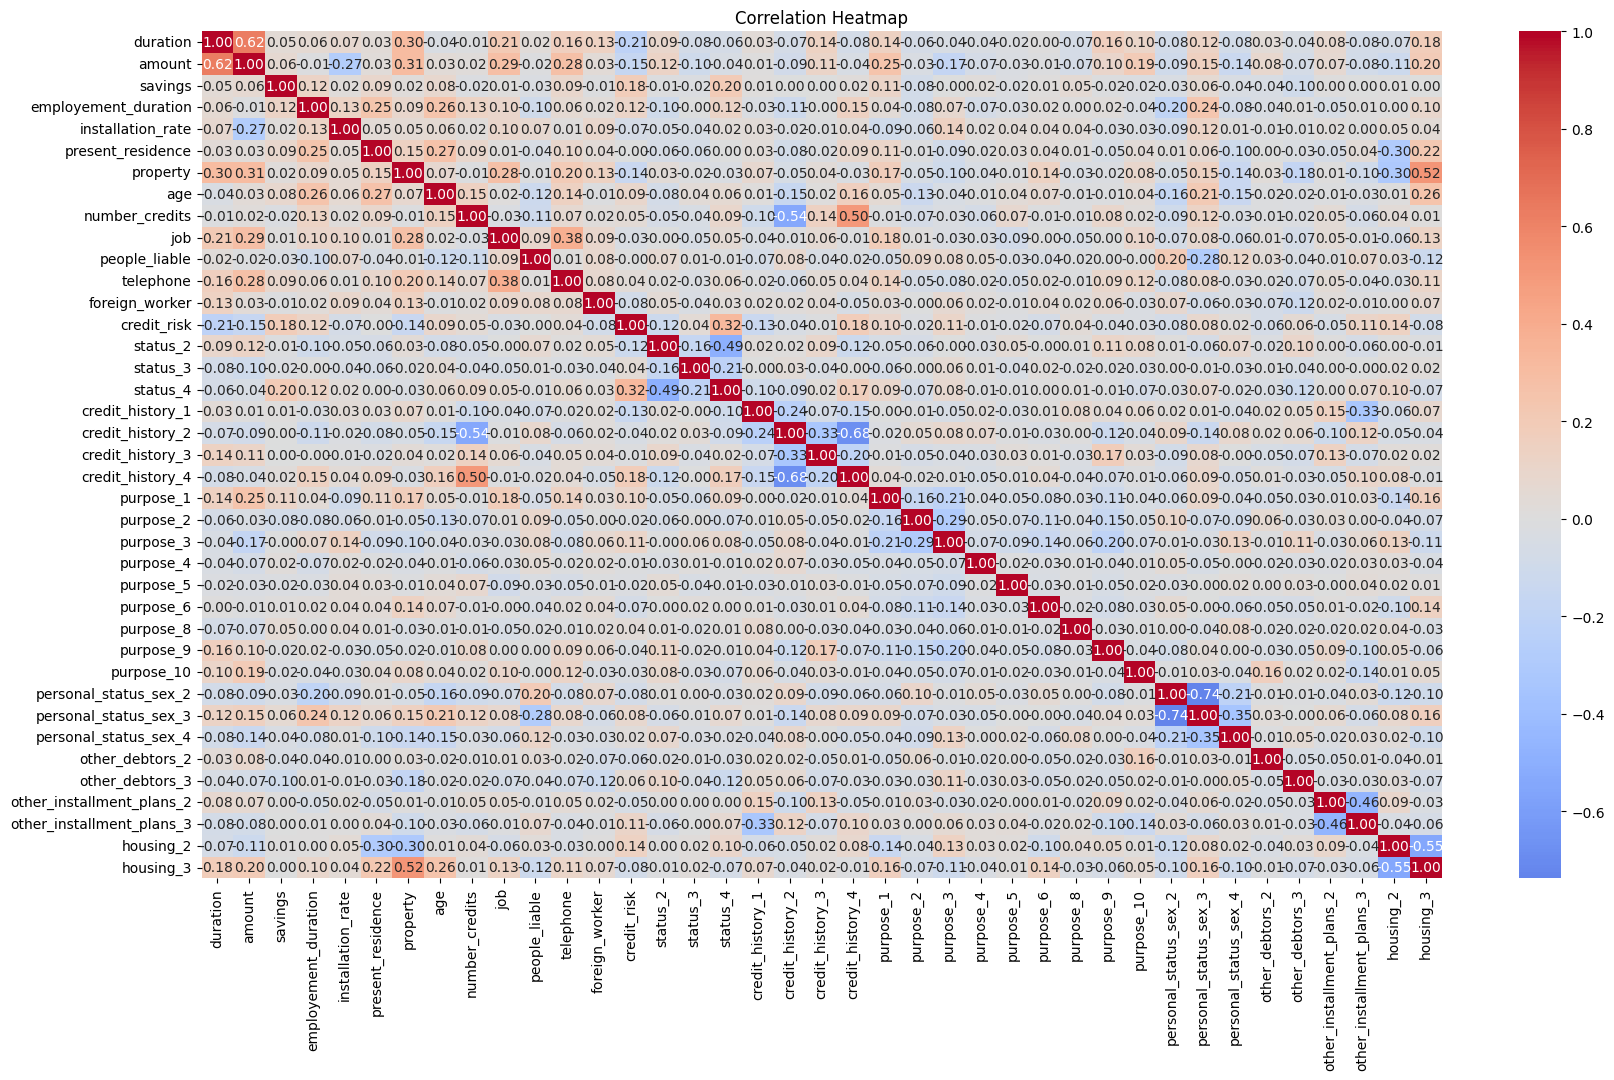

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Box plots

<Figure size 2000x1500 with 0 Axes>

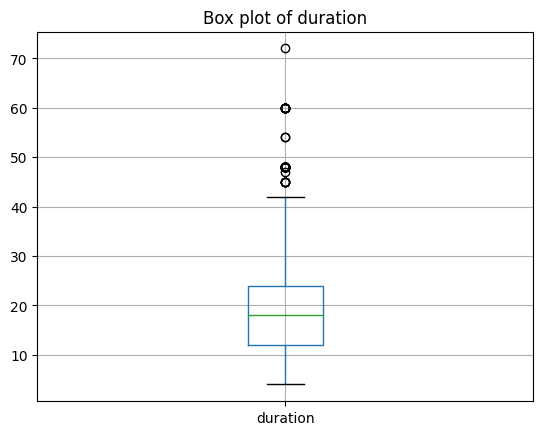

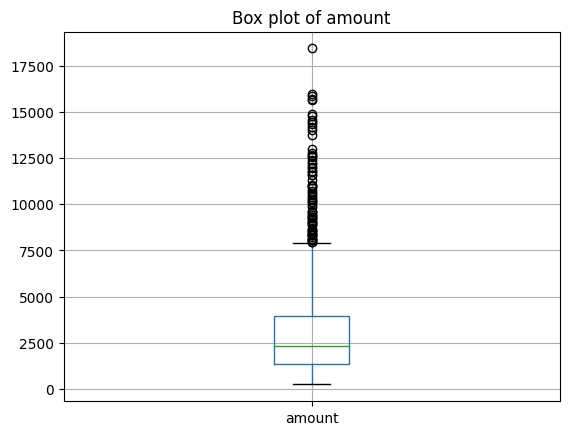

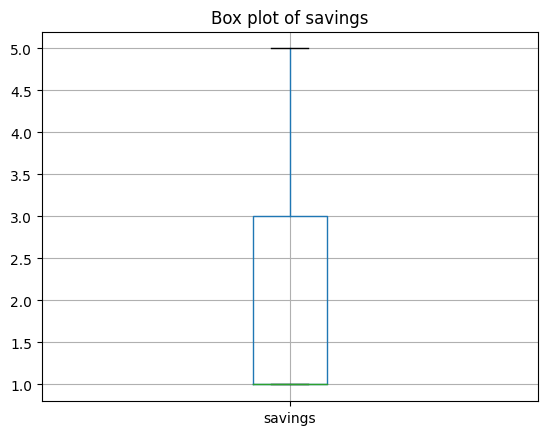

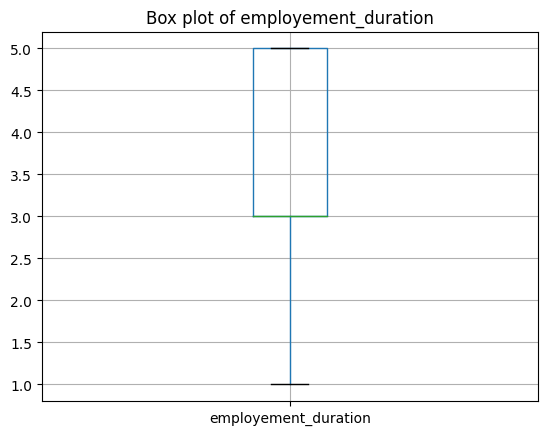

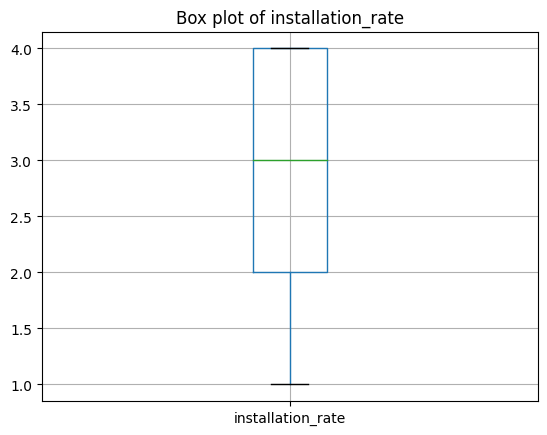

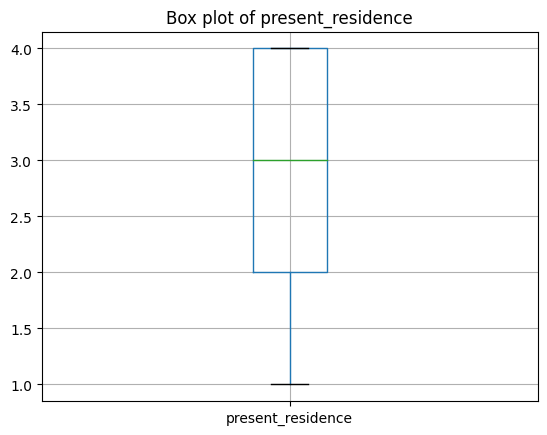

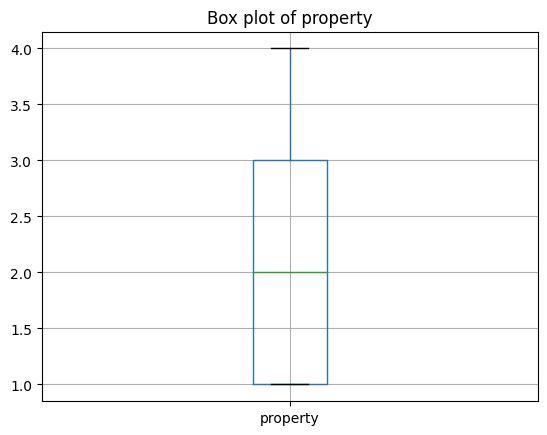

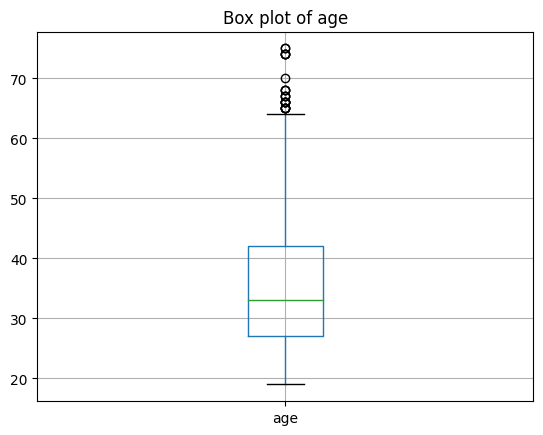

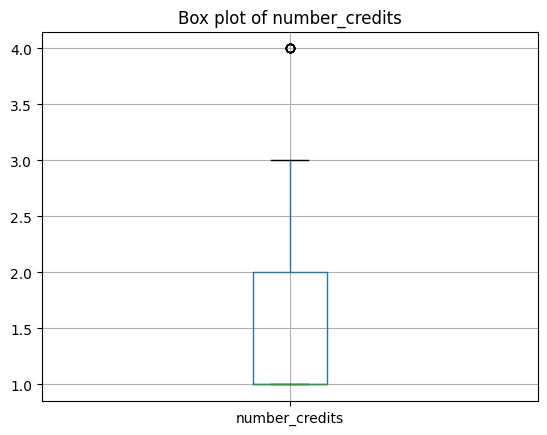

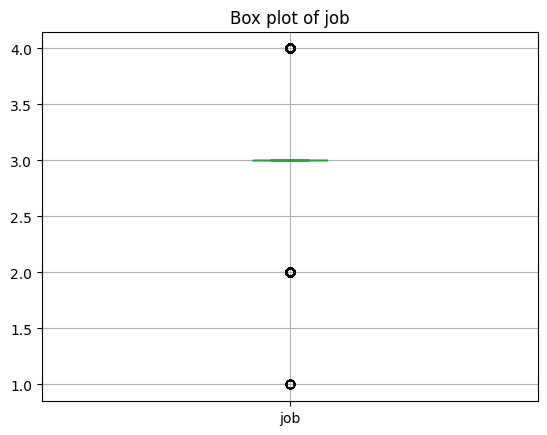

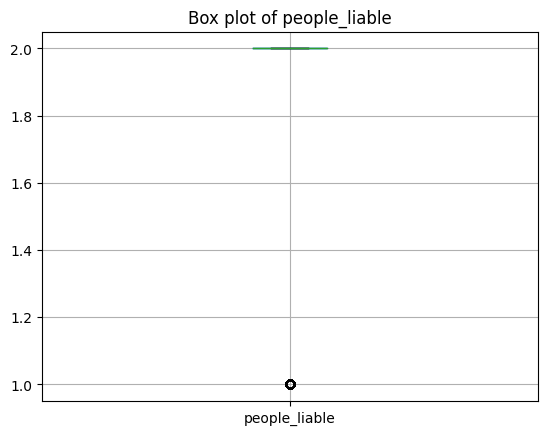

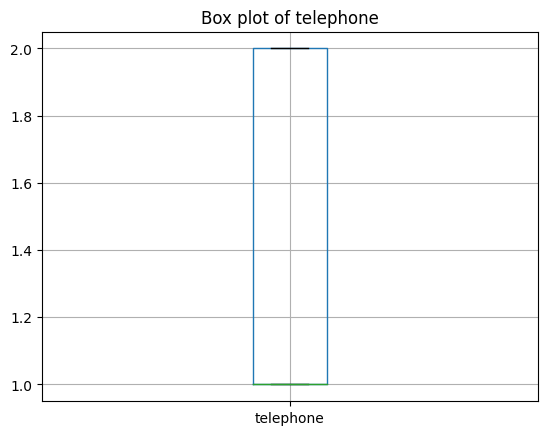

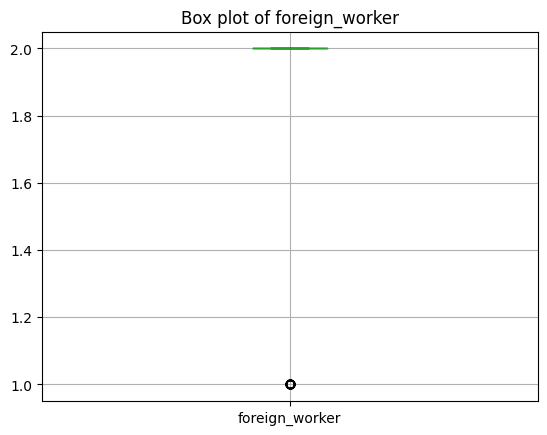

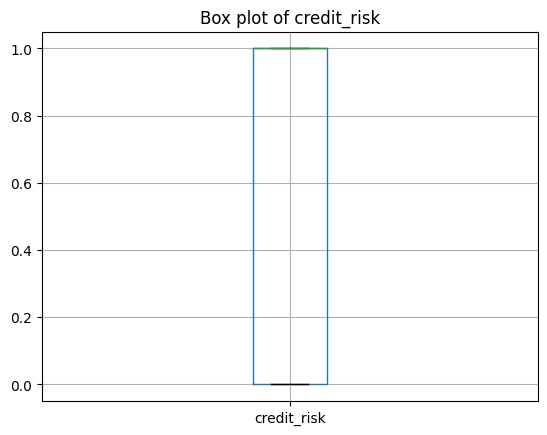

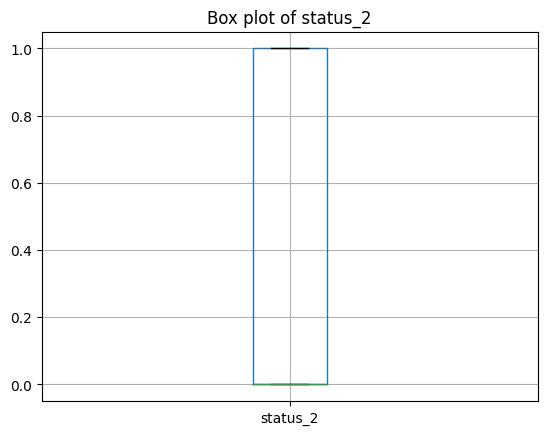

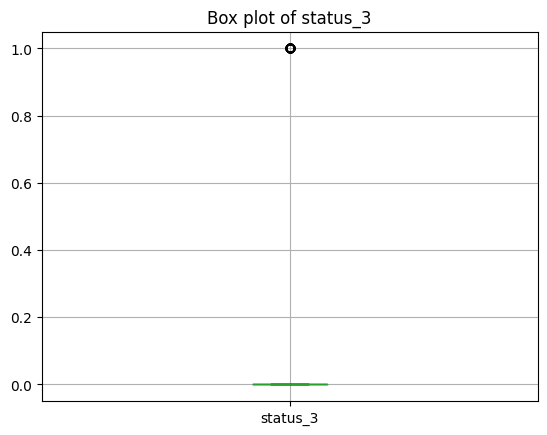

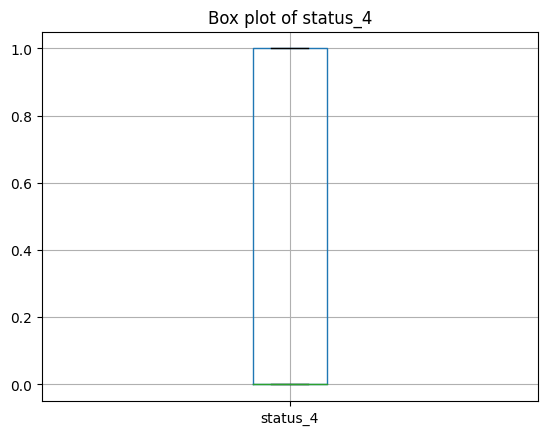

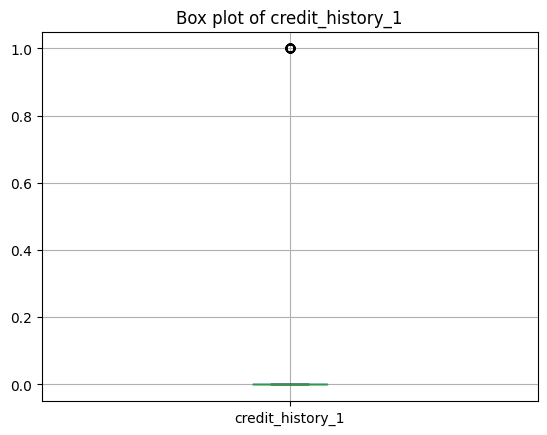

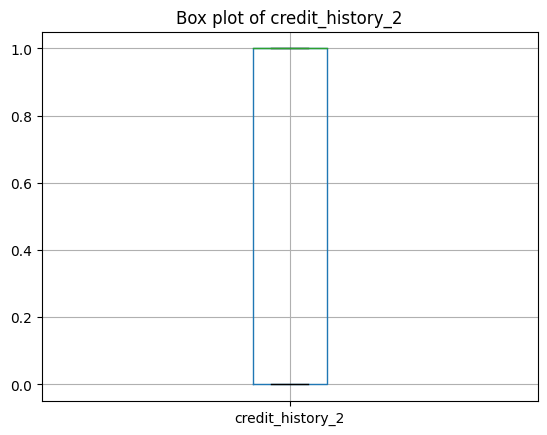

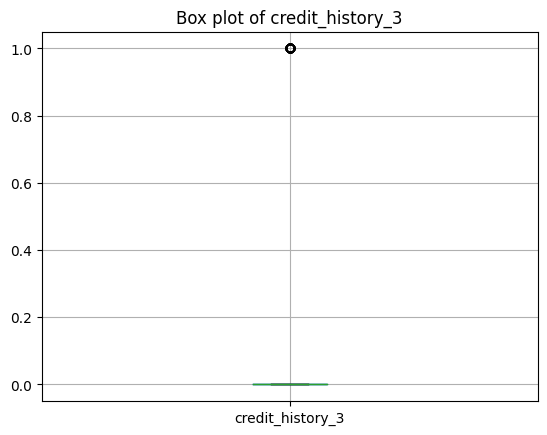

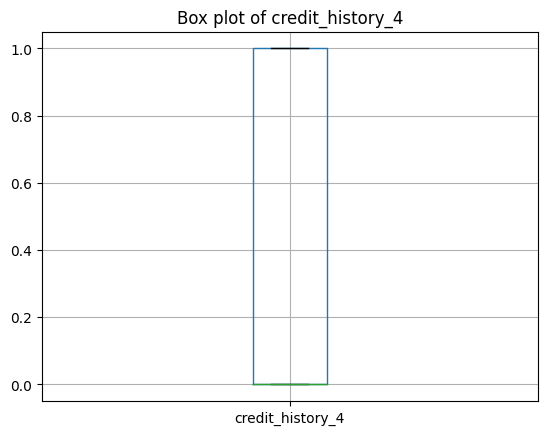

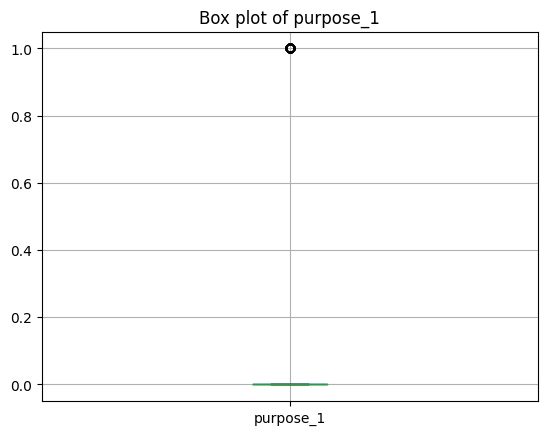

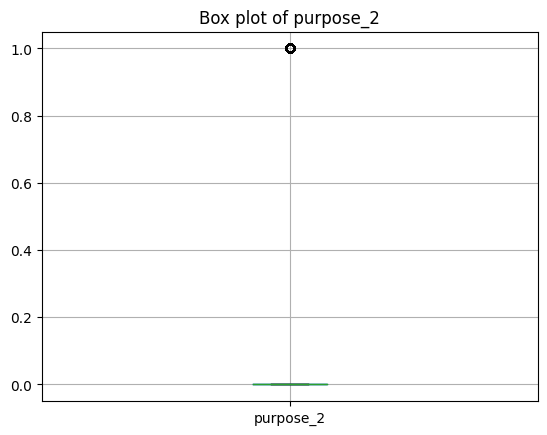

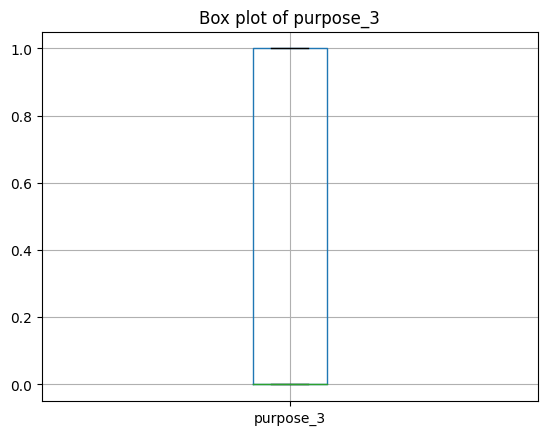

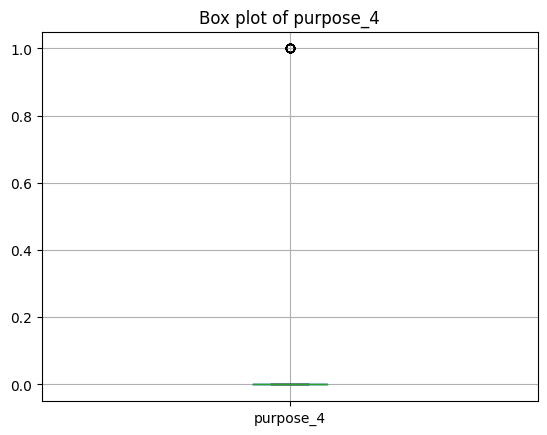

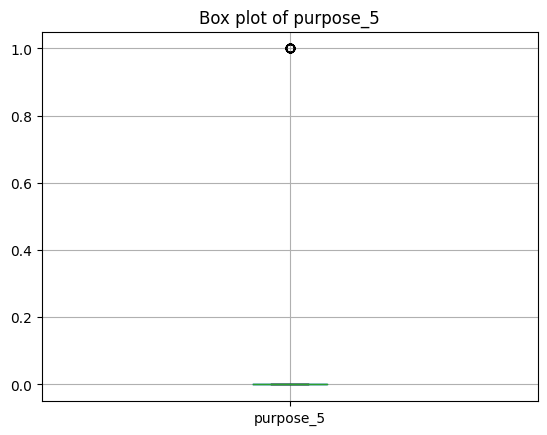

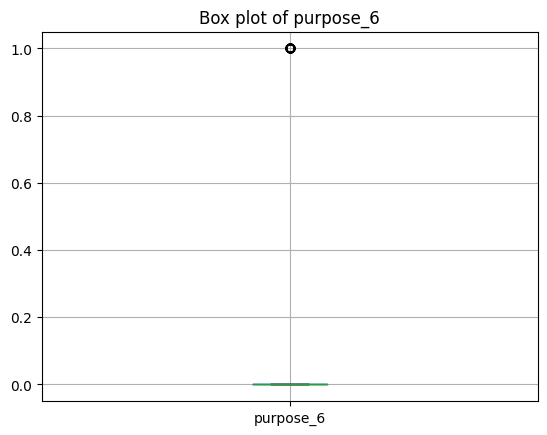

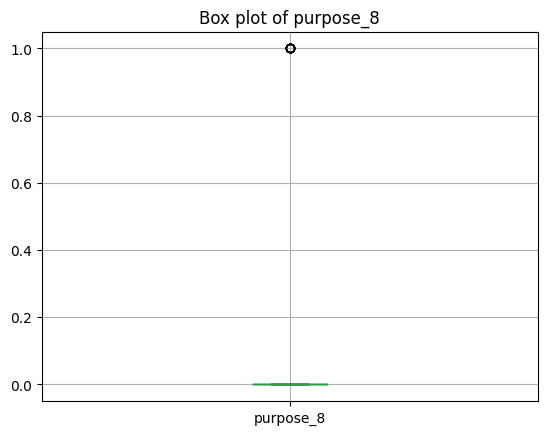

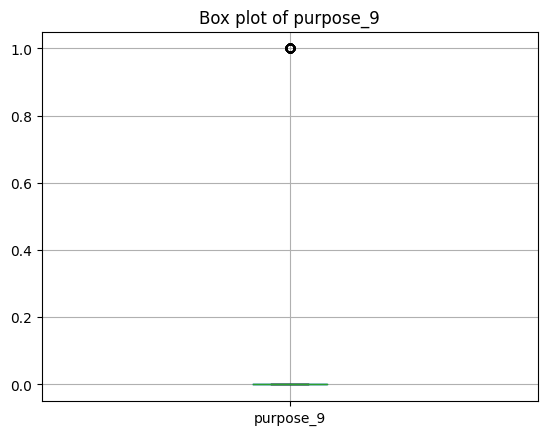

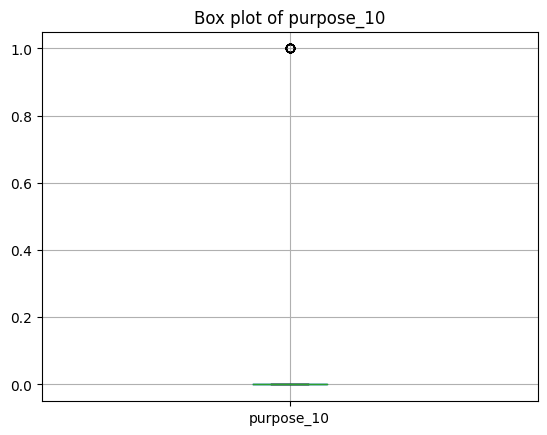

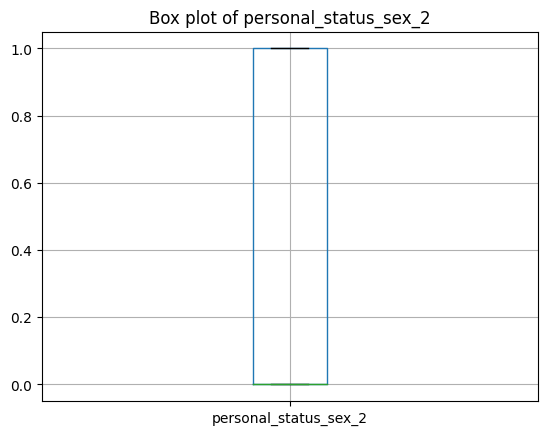

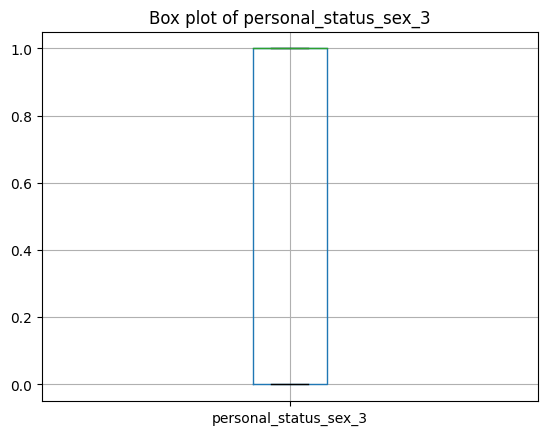

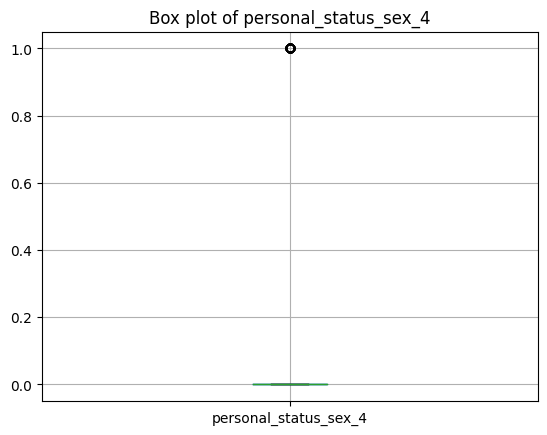

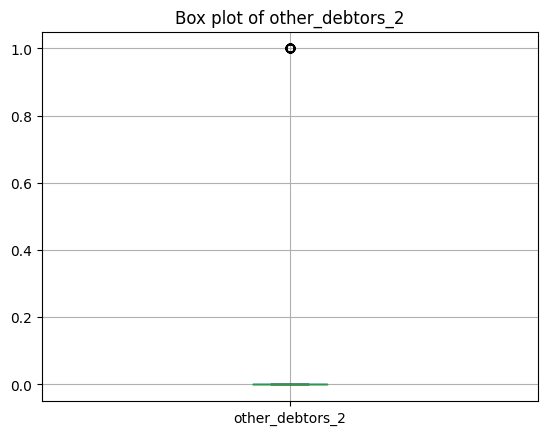

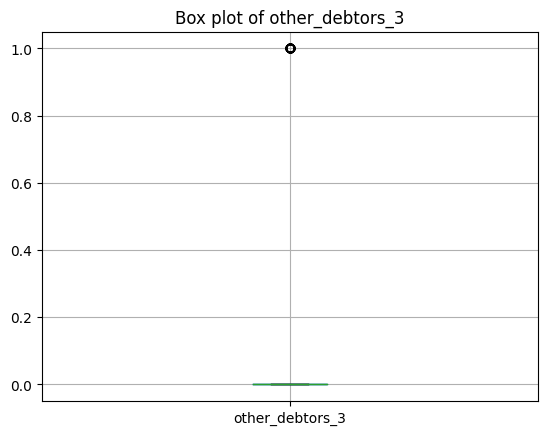

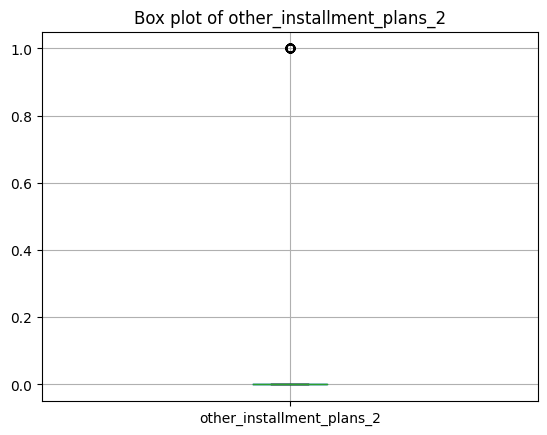

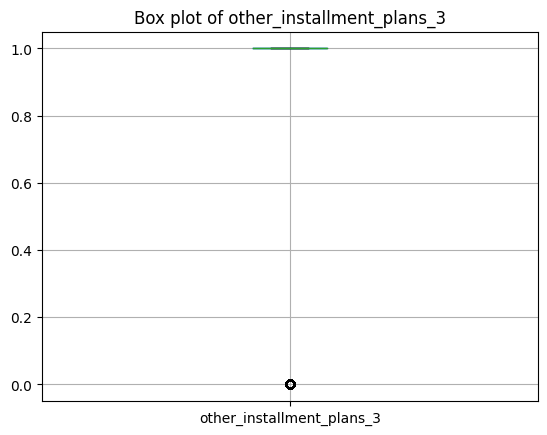

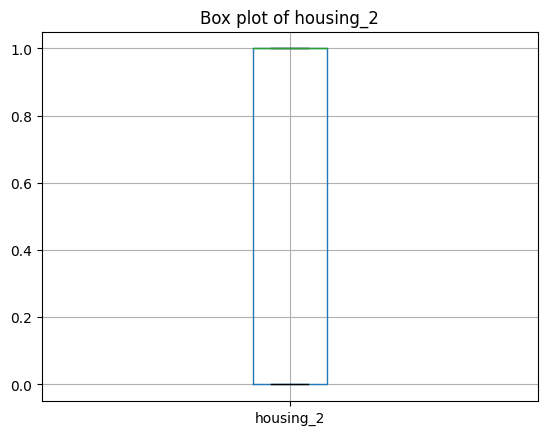

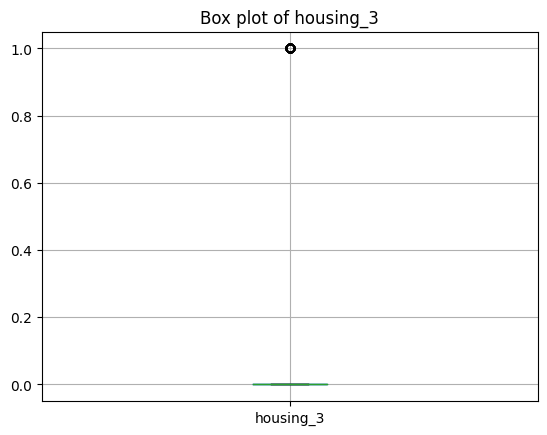

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 15))

for column in data.columns:
    plt.figure()  # Create a new figure for each box plot
    data.boxplot(column=[column])  # Plot box plot for the current column
    plt.title(f'Box plot of {column}')  # Set the title
    plt.show()  # Show the box plot


**Bivariate analysis**

In [ ]:
import pandas as pd

# Create a pandas DataFrame
data = pd.DataFrame(data)

# Check for missing values using the .isnull() method
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


duration                     0
amount                       0
savings                      0
employement_duration         0
installation_rate            0
present_residence            0
property                     0
age                          0
number_credits               0
job                          0
people_liable                0
telephone                    0
foreign_worker               0
credit_risk                  0
status_2                     0
status_3                     0
status_4                     0
credit_history_1             0
credit_history_2             0
credit_history_3             0
credit_history_4             0
purpose_1                    0
purpose_2                    0
purpose_3                    0
purpose_4                    0
purpose_5                    0
purpose_6                    0
purpose_8                    0
purpose_9                    0
purpose_10                   0
personal_status_sex_2        0
personal_status_sex_3        0
personal

Line Plot

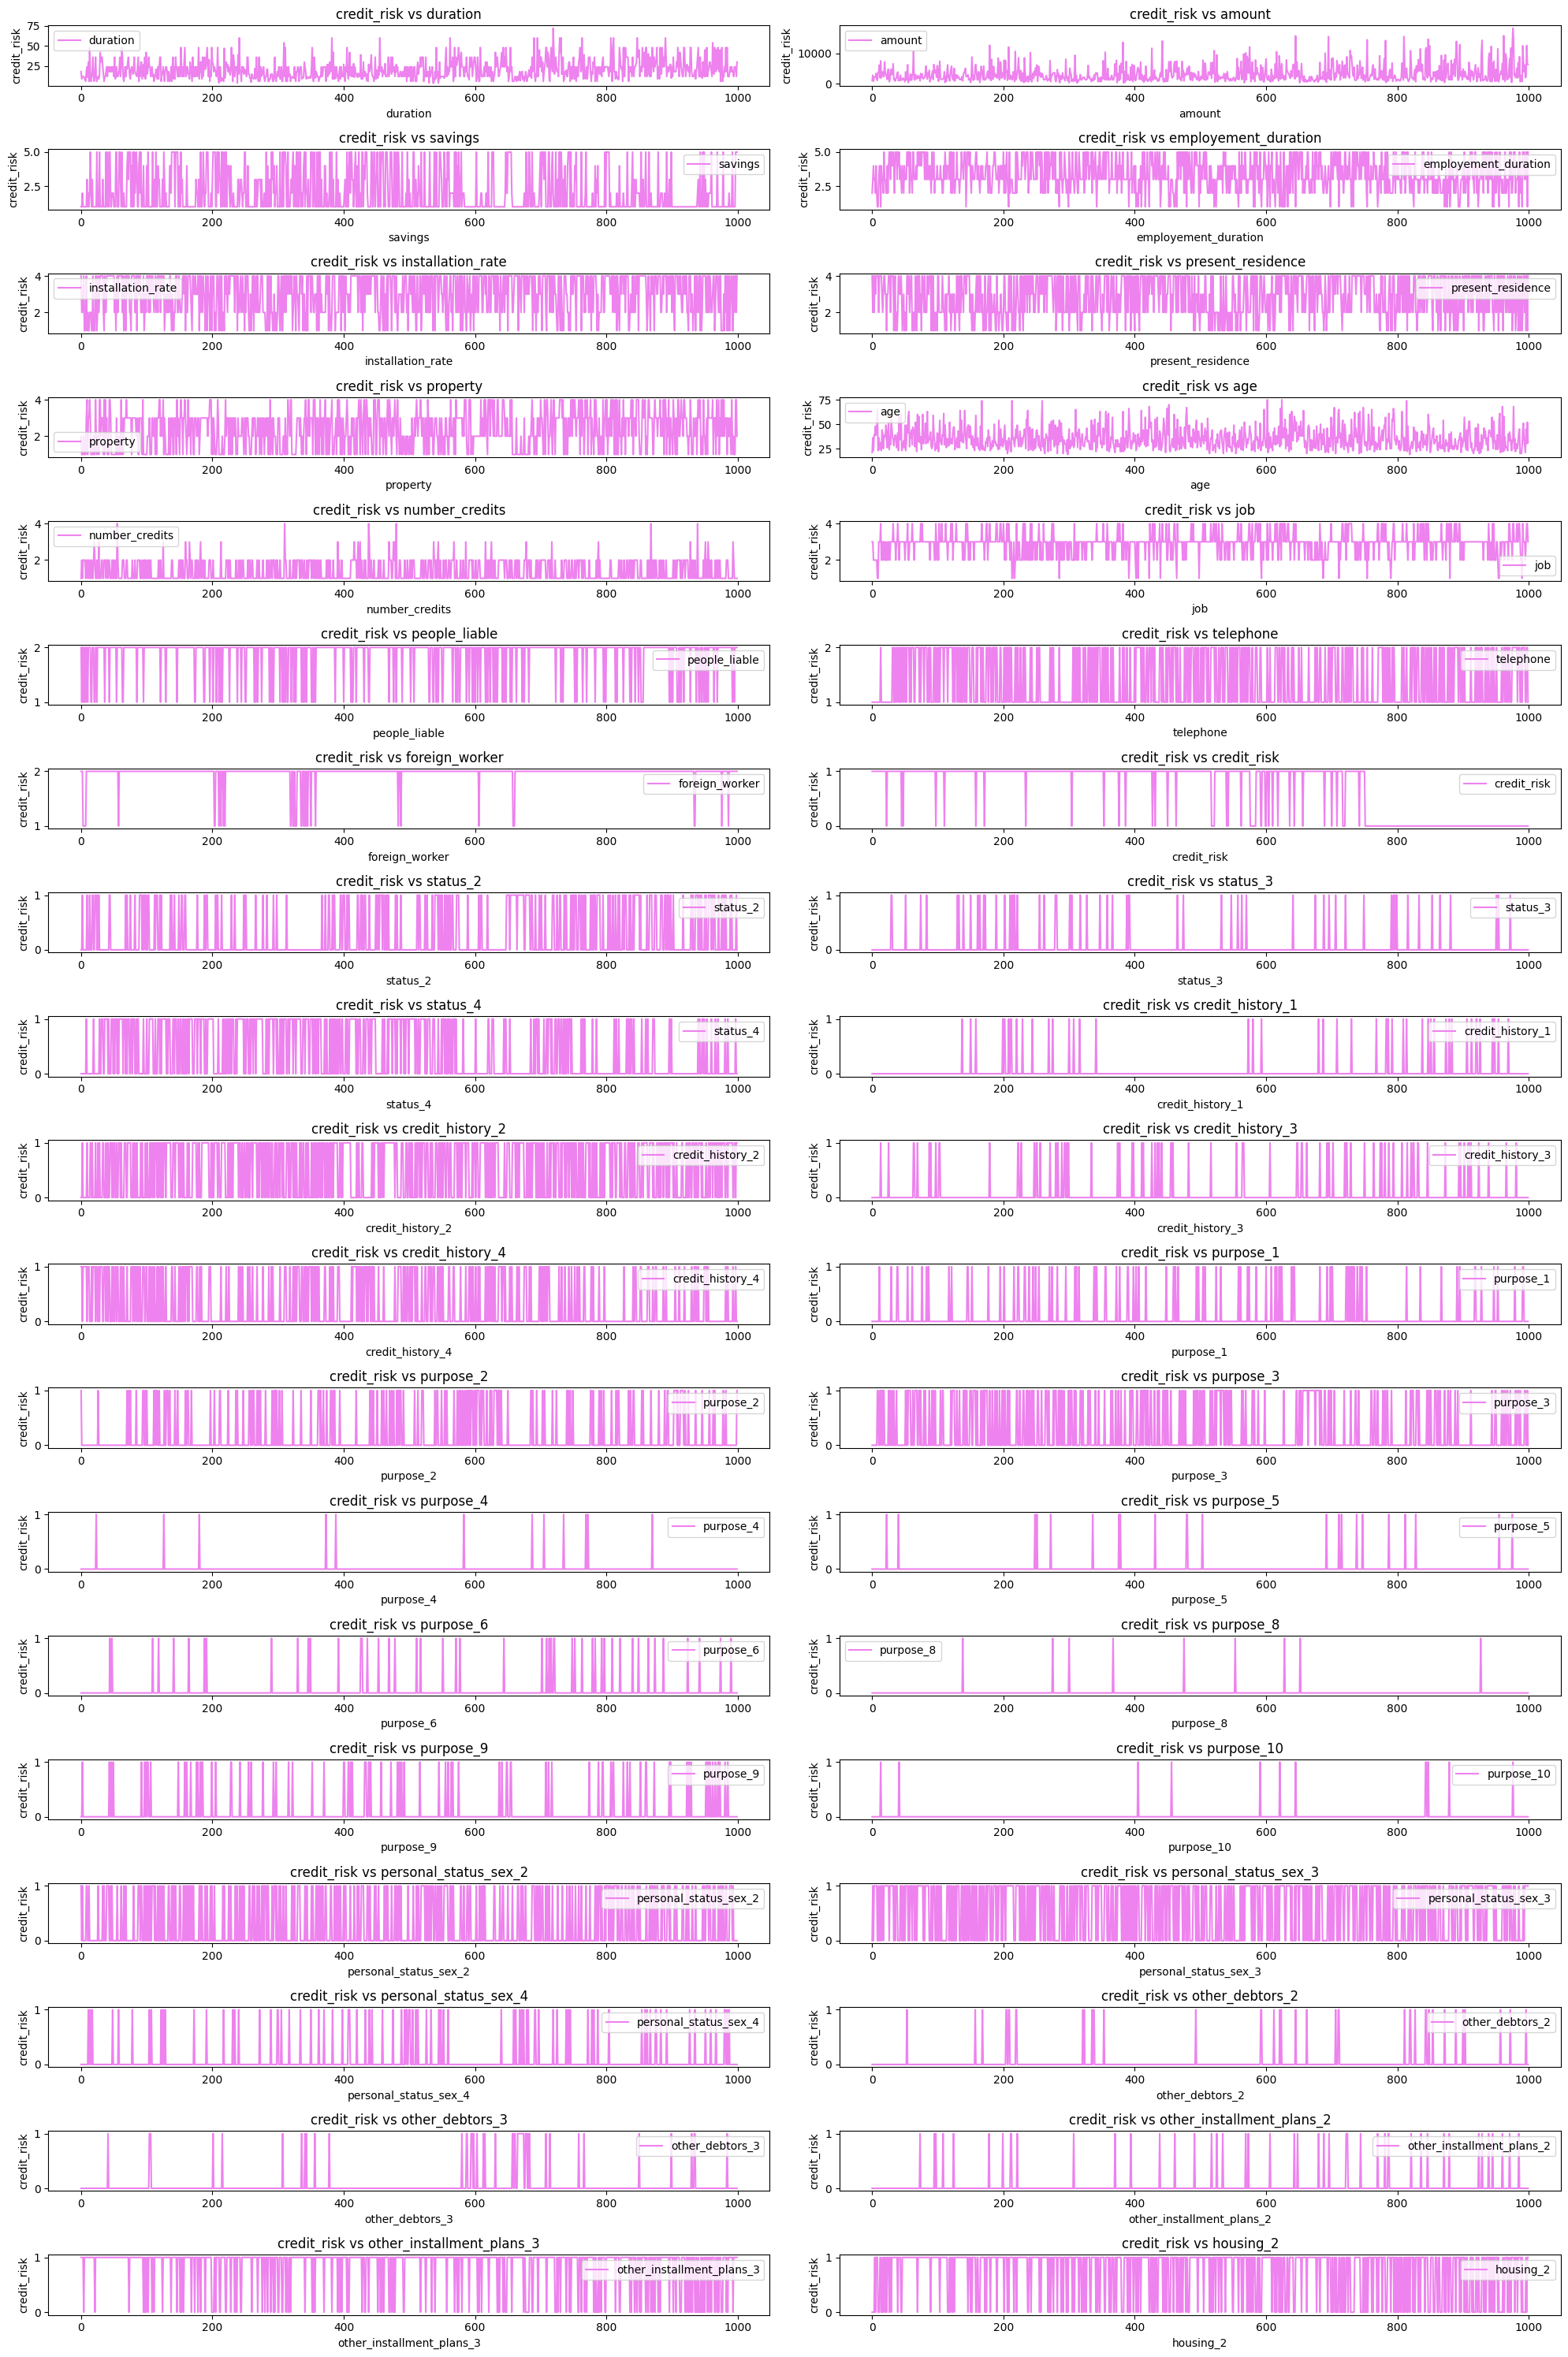

In [ ]:
import matplotlib.pyplot as plt

target_variable = 'credit_risk'
# Get the list of features
features = data.columns[:-1]

# Calculate the number of features
num_features = len(features)
num_cols = 2

# Calculate the number of rows required for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Plot the features against the concrete strength with violet color
for i, feature in enumerate(features):
    row, col = divmod(i, num_cols)
    axes[row, col].plot(data.index, data[feature], label=feature, color='violet')

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target_variable)  # Set y-label as 'concrete_strength'
    axes[row, col].set_title(f'{target_variable} vs {feature}')
    axes[row, col].legend()

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


VIF CHECK

In [ ]:
y = data['credit_risk']
X = data.drop('credit_risk', axis=1)
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X)

,variables,VIF
0,duration,8.041168
1,amount,5.742952
2,savings,3.113625
3,employement_duration,10.999278
4,installation_rate,10.978400
5,present_residence,9.850525
6,property,9.968061
7,age,14.119904
8,number_credits,10.732455
9,job,27.681800


**Train Test Split**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into features and target
x = data.drop('credit_risk', axis=1)
y = data['credit_risk']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)


In [ ]:
x_train.head()

,duration,amount,savings,employement_duration,installation_rate,present_residence,property,age,number_credits,job,...,purpose_10,personal_status_sex_2,personal_status_sex_3,personal_status_sex_4,other_debtors_2,other_debtors_3,other_installment_plans_2,other_installment_plans_3,housing_2,housing_3
541,48,3979,5,4,4,1,3,41,2,3,...,0,0,1,0,0,0,0,1,1,0
440,21,2288,1,2,4,4,2,23,1,3,...,0,1,0,0,0,0,0,1,1,0
482,24,3863,1,3,1,2,4,32,1,3,...,0,0,1,0,0,0,0,1,0,1
422,16,1175,1,1,2,3,3,68,3,1,...,0,0,1,0,0,0,0,1,0,1
778,18,1245,1,3,4,2,3,33,1,3,...,0,0,0,1,0,0,0,1,1,0


In [ ]:
x_test.head()

,duration,amount,savings,employement_duration,installation_rate,present_residence,property,age,number_credits,job,...,purpose_10,personal_status_sex_2,personal_status_sex_3,personal_status_sex_4,other_debtors_2,other_debtors_3,other_installment_plans_2,other_installment_plans_3,housing_2,housing_3
521,36,10974,1,1,4,2,3,26,2,4,...,0,1,0,0,0,0,0,1,1,0
737,18,1149,4,3,4,3,1,46,2,3,...,0,0,1,0,0,0,0,1,1,0
740,12,1736,1,4,3,4,1,31,1,2,...,0,1,0,0,0,0,0,1,1,0
660,8,1414,1,3,4,2,1,33,1,3,...,0,0,1,0,0,1,0,1,1,0
411,24,2978,5,3,4,4,1,32,2,3,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
x_train.shape

(700, 38)

In [ ]:
x_test.shape

(300, 38)





**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Create a logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(x_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(x_test)

#Evaluate the model's performance
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.760


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.760


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest classifier
random_forest = RandomForestClassifier()

# Training the classifier
random_forest.fit(x_train, y_train)

# Making predictions on the test set
predictions = random_forest.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.747


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.713


**SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn.svm import SVC

# Create an SVM model
model = SVC()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.717


**XG BOOST MODEL**

In [ ]:
import xgboost as xgb

# Split the data into features and target
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']

# Create an XGBoost model
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.3f}")



Accuracy: 0.746


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#creating gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

#training the classifier
gb_classifier.fit(x_train,y_train)

# Making predictions on the test set
predictions = gb_classifier.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.753


**Neura Network**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# seperate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# standardize the features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.40)

# define the ann model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer with 32 neurons
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Hidden layer with 16 neurons
model.add(Dense(1, activation='relu'))  # Output layer with 1 neuron

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluating the model on the test set
score = model.evaluate(X_test, y_test)
rounded_accuracy = round(score[1], 3)  # Rounding accuracy to 3 digits
print('test loss:', score[0])
print("Test Accuracy:", rounded_accuracy)

Epoch 1/100
19/19 [==============================] - 3s 10ms/step - loss: 1.5249 - accuracy: 0.8733
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 1.5755 - accuracy: 0.8950
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 1.5125 - accuracy: 0.8967
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 1.1454 - accuracy: 0.9017
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9904 - accuracy: 0.8900
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7860 - accuracy: 0.9150
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.7605 - accuracy: 0.9217
Epoch 8/100
19/19 [==============================] - 0s 19ms/step - loss: 0.6738 - accuracy: 0.9250
Epoch 9/100
19/19 [==============================] - 0s 19ms/step - loss: 0.6416 - accuracy: 0.9100
Epoch 10/100
19/19 [==============================] - 0s 19ms/step - loss: 0.4764 - accuracy: 0.8867
Epoch